In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data1= pd.read_csv('takehome_users.csv', encoding='latin-1')
data1.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
data1.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
dtype: object

In [4]:
data1.shape

(12000, 10)

In [5]:
data1.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [6]:
data1.isnull().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [7]:
#renaming the columns
data1.rename(columns={"object_id": "user_id"}, inplace=True)
data1.rename(columns={"last_session_creation_time": "last_login"}, inplace=True)
data1.head()

,user_id,creation_time,name,email,creation_source,last_login,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,4/22/2014 3:53,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,11/15/2013 3:45,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,3/19/2013 23:14,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,5/21/2013 8:09,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,1/17/2013 10:14,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [8]:
data1['creation_time'] = pd.to_datetime(data1['creation_time'])
data1['last_login'] = pd.to_datetime(data1['last_login'], unit='s')
data1.set_index("user_id", inplace=True)
data1.head()

,creation_time,name,email,creation_source,last_login,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
user_id,,,,,,,,,
1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


In [9]:
# calculate user history, defined as the number of days between account creation and last use
data1['user_history'] = data1['last_login'] - data1['creation_time']
data1['user_history'] = data1['user_history'].dt.days
# calculate account age, defined as number of days since account creation and now
# the latest date in creation_time
latest = max(data1['last_login'])
data1['account_age'] = latest - data1['creation_time']
data1['account_age'] = data1['account_age'].dt.days
# drop the two original columns
#df = df.drop(['creation_time', 'last_login'], axis=1)
data1.head()

,creation_time,name,email,creation_source,last_login,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_history,account_age
user_id,,,,,,,,,,,
1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,45
2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136.0,203
3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,443
4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,381
5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.0,505


In [10]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   creation_time               12000 non-null  datetime64[ns]
 1   name                        12000 non-null  object        
 2   email                       12000 non-null  object        
 3   creation_source             12000 non-null  object        
 4   last_login                  8823 non-null   datetime64[ns]
 5   opted_in_to_mailing_list    12000 non-null  int64         
 6   enabled_for_marketing_drip  12000 non-null  int64         
 7   org_id                      12000 non-null  int64         
 8   invited_by_user_id          6417 non-null   float64       
 9   user_history                8823 non-null   float64       
 10  account_age                 12000 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(3)


In [11]:
data2= pd.read_csv('takehome_user_engagement.csv')
data2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [12]:
data2.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [13]:
data2.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [14]:
data2.shape

(207917, 3)

In [15]:
data2.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [16]:
#check how many users and how many logins
print('There were {} users and {} total logins'.format(
    data2['user_id'].nunique(), len(data2)
))

There were 8823 users and 207917 total logins


In [17]:
data2['time_stamp'] = pd.to_datetime(data2['time_stamp'])
data2.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [18]:
data2['Week'] = data2['time_stamp'].apply(lambda t: t.week)
data2.head()

,time_stamp,user_id,visited,Week
0,2014-04-22 03:53:30,1,1,17
1,2013-11-15 03:45:04,2,1,46
2,2013-11-29 03:45:04,2,1,48
3,2013-12-09 03:45:04,2,1,50
4,2013-12-25 03:45:04,2,1,52


In [19]:
# define adopted users as the users who logged in on 3 seperate days in a 7-day period.
def login_in_days(data, days=7, logins=3):
    from datetime import timedelta
    # first drop duplicate days and sort by day
    data['date'] = data['time_stamp'].dt.date
    data = data.drop_duplicates(subset='date').sort_values('date')
    # calculate how many days has passed for every 3 logins
    passed_days = data['date'].diff(periods=logins-1)
    # check if any passed time is less than 7 days
    return any(passed_days <= timedelta(days=days))

In [20]:
# run the function on all users
adopted_users = data2.groupby('user_id').apply(login_in_days)
adopted_users.name = 'adopted_users'

In [21]:
adopted_users.value_counts()

False    7167
True     1656
Name: adopted_users, dtype: int64

In [22]:
#merging the datasets
df=pd.concat([data1, adopted_users], axis=1, join='inner')
df['adopted_users']=df['adopted_users'].astype(int)
df.head()

,creation_time,name,email,creation_source,last_login,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_history,account_age,adopted_users
user_id,,,,,,,,,,,,
1,2014-04-22 03:53:00,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,45,0
2,2013-11-15 03:45:00,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,136.0,203,1
3,2013-03-19 23:14:00,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,443,0
4,2013-05-21 08:09:00,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,381,0
5,2013-01-17 10:14:00,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,5.0,505,0


In [23]:
# drop the two original columns
df = df.drop(['creation_time', 'last_login', 'name', 'email', 'org_id', 'invited_by_user_id' ], axis=1)
df.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,user_history,account_age,adopted_users
user_id,,,,,,
1,GUEST_INVITE,1,0,0.0,45,0
2,ORG_INVITE,0,0,136.0,203,1
3,ORG_INVITE,0,0,0.0,443,0
4,GUEST_INVITE,0,0,1.0,381,0
5,GUEST_INVITE,0,0,5.0,505,0


# EDA

In [24]:
df['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [25]:
df['creation_source'].describe()

count           8823
unique             5
top       ORG_INVITE
freq            3188
Name: creation_source, dtype: object

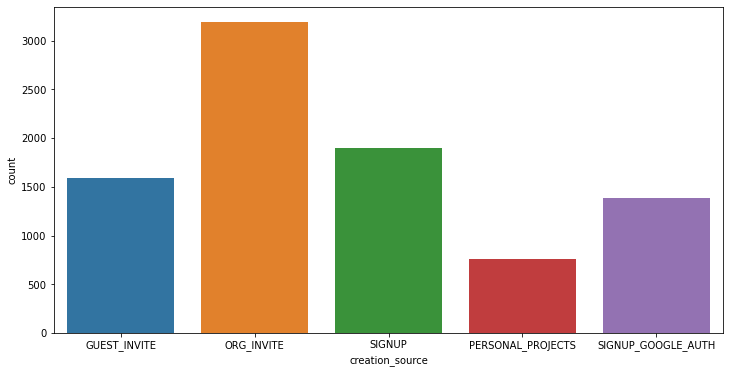

In [26]:
#visualizing the data
plt.figure(figsize=(12,6))
sns.countplot(x="creation_source", data=df)
plt.show()

In [27]:
# Adoption status according to creation source
round(pd.crosstab(df.creation_source, df.adopted_users, normalize='columns')*100,2)

adopted_users,0,1
creation_source,,
GUEST_INVITE,17.01,22.28
ORG_INVITE,36.47,34.66
PERSONAL_PROJECTS,8.26,10.39
SIGNUP,22.27,18.24
SIGNUP_GOOGLE_AUTH,15.99,14.43


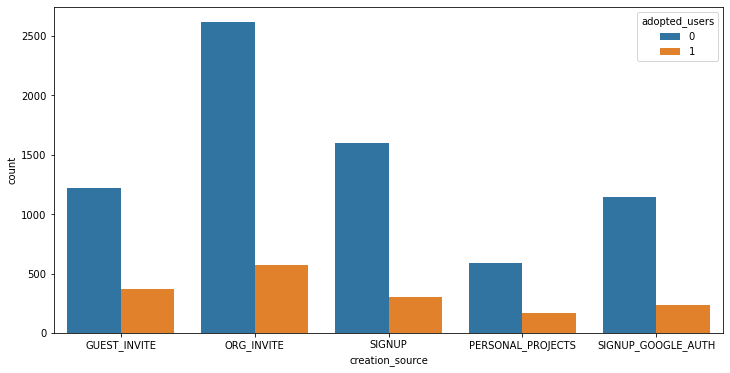

In [28]:
#visualizing the data
plt.figure(figsize=(12,6))
sns.countplot(x="creation_source", data=df, hue='adopted_users')
plt.show()

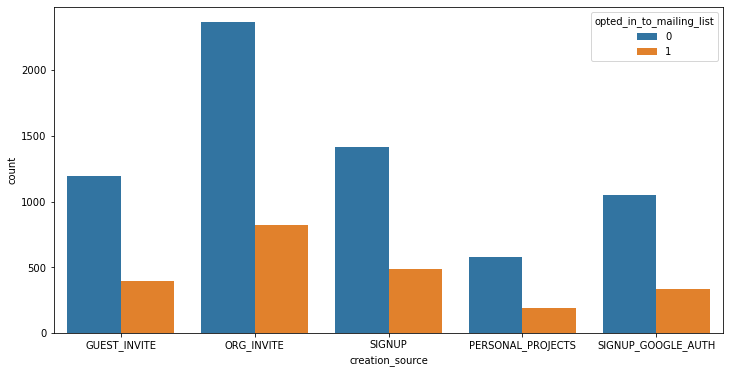

In [29]:
#visualizing the data
plt.figure(figsize=(12,6))
sns.countplot(x="creation_source", data=df, hue='opted_in_to_mailing_list')
plt.show()

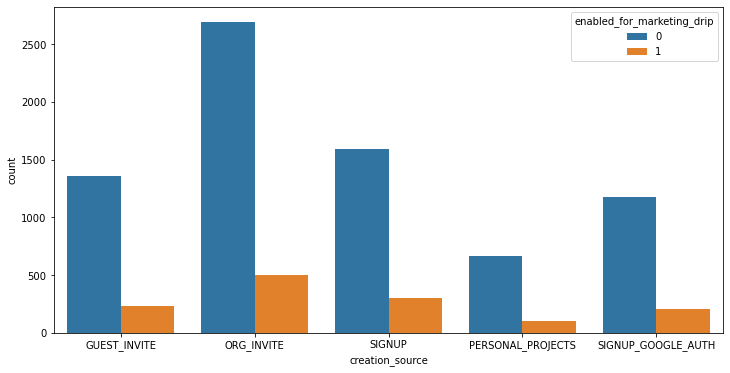

In [30]:
#visualizing the data
plt.figure(figsize=(12,6))
sns.countplot(x="creation_source", data=df, hue='enabled_for_marketing_drip')
plt.show()

In [31]:
# chi2 test
from scipy.stats import chi2_contingency
crosstab = pd.crosstab(df['creation_source'], df['adopted_users'])
results = chi2_contingency(crosstab)
print('chi2 = {}\tp = {}'.format(results[0], results[1]))

chi2 = 41.27933208242451	p = 2.3526508745340972e-08


In [32]:
# Chi2 test significant. How much was the difference?
df.groupby('creation_source')['adopted_users'].apply(lambda x: sum(x)/len(x))

creation_source
GUEST_INVITE          0.232368
ORG_INVITE            0.180050
PERSONAL_PROJECTS     0.225131
SIGNUP                0.159115
SIGNUP_GOOGLE_AUTH    0.172563
Name: adopted_users, dtype: float64

In [33]:
#mailing list and marketing drip
df.groupby('opted_in_to_mailing_list')['adopted_users'].apply(lambda x: sum(x)/len(x))

opted_in_to_mailing_list
0    0.185994
1    0.192722
Name: adopted_users, dtype: float64

In [34]:
def z_test(data, col, target='adopted_users'):
    from statsmodels.stats.weightstats import CompareMeans
    opted_in = data.loc[df[col]==1, target]
    opted_out = data.loc[df[col]==0, target]
    z_data = CompareMeans.from_data(opted_in, opted_out)
    z, p = CompareMeans.ztest_ind(z_data)
    print('For {}, z = {}, p = {}'.format(col, z, p))
z_test(df, 'opted_in_to_mailing_list')

For opted_in_to_mailing_list, z = 0.7029779128148219, p = 0.4820695142048773


In [35]:
df.groupby('enabled_for_marketing_drip')['adopted_users'].apply(lambda x: sum(x)/len(x))

enabled_for_marketing_drip
0    0.186982
1    0.191648
Name: adopted_users, dtype: float64

In [36]:
z_test(df, 'enabled_for_marketing_drip')

For enabled_for_marketing_drip, z = 0.40292649500940353, p = 0.6870022995069649


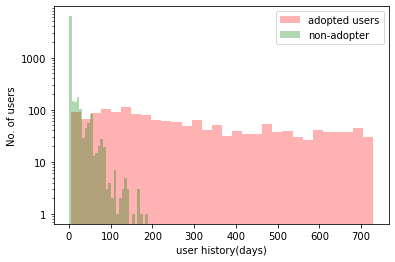

In [37]:
# history and adopted user
def plot_hist_days(data, col, xlabel):
    _ = plt.hist(data.loc[df['adopted_users']==1, col], 
                 bins=30, alpha=0.3, color='r', label='adopted users')
    _ = plt.hist(data.loc[df['adopted_users']==0, col], 
                 bins=30, alpha=0.3, color='g', label='non-adopter')
    _ = plt.yscale('log')
    _ = plt.legend()
    _ = plt.xlabel(xlabel)
    _ = plt.ylabel('No. of users')
    _ = plt.yticks([1, 10, 100, 1000], ['1', '10', '100', '1000'])
plot_hist_days(df, 'user_history', 'user history(days)')

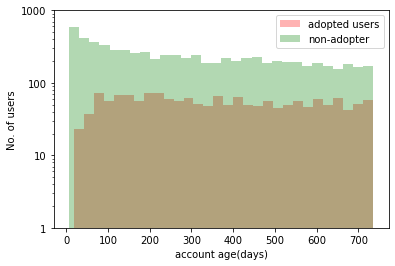

In [38]:
plot_hist_days(df, 'account_age', 'account age(days)')

# Modeling 

In [39]:
# make dummy variable for creation source
creation_source = pd.get_dummies(df['creation_source'], drop_first=True)
model_df = pd.concat([df, creation_source], axis=1).drop('creation_source', axis=1)
y = model_df['adopted_users']
X = model_df.drop('adopted_users', axis=1)
#use random forest model, which is not affectd by the different scales
# create training and testing sets
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, stratify=y, random_state=42)

In [40]:
# use random forest model with balanced class weights to correct for imbalance in the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# use CV to tune number of trees
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 200}
Best average precision was 0.9625206376609052


In [41]:
# evluation of the model
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=100
)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.9524025385312783
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1792
           1       0.88      0.86      0.87       414

    accuracy                           0.95      2206
   macro avg       0.93      0.92      0.92      2206
weighted avg       0.95      0.95      0.95      2206



In [42]:
# take a look at feature importance
imp = pd.Series(model.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

user_history                  0.897806
account_age                   0.086858
opted_in_to_mailing_list      0.003120
SIGNUP                        0.002962
enabled_for_marketing_drip    0.002887
SIGNUP_GOOGLE_AUTH            0.002135
ORG_INVITE                    0.002121
PERSONAL_PROJECTS             0.002111
dtype: float64
